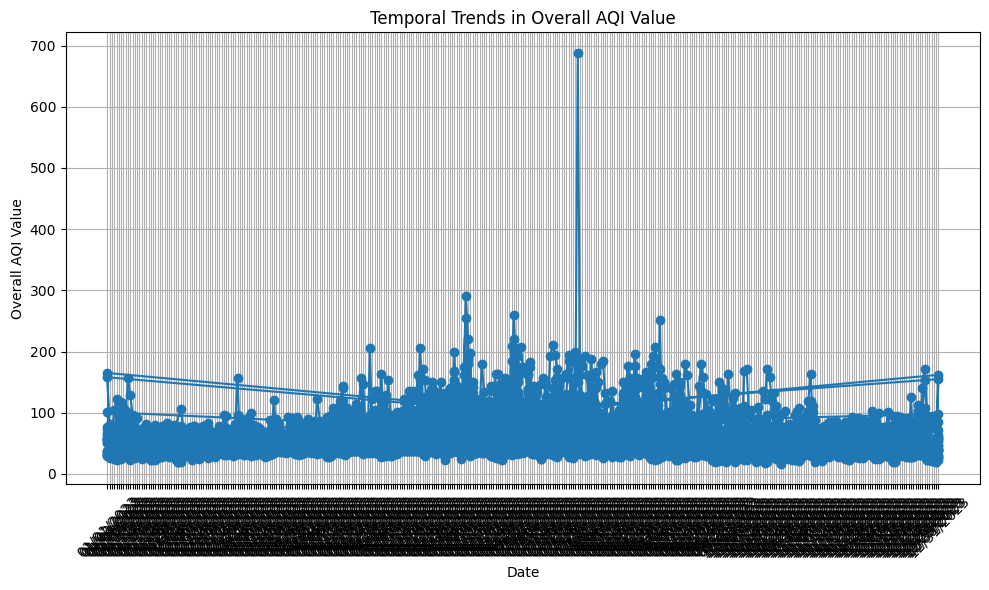

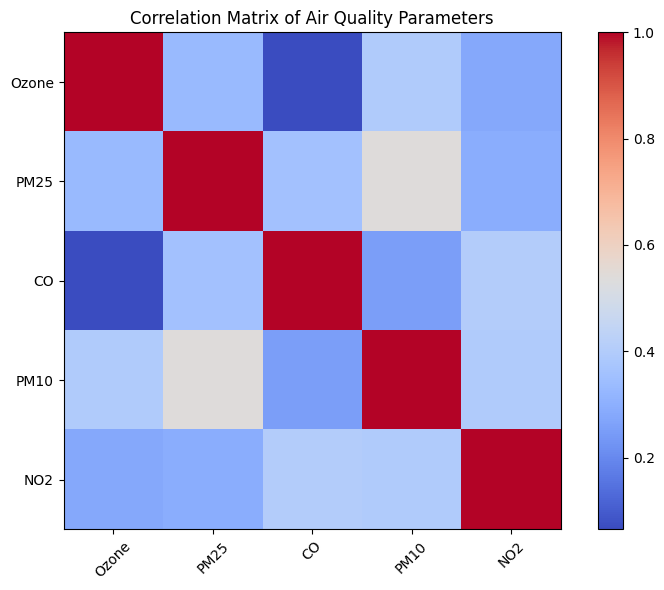

             Ozone         PM25           CO         PM10          NO2
count  8255.000000  8258.000000  8177.000000  6652.000000  8126.000000
mean     47.981829    45.606442     6.965513    25.026158    27.247969
std      25.870648    21.530213     4.106970    20.314618    11.830981
min       1.000000     3.000000     0.000000     1.000000     0.000000
25%      33.000000    30.000000     5.000000    13.000000    19.000000
50%      41.000000    43.000000     6.000000    19.000000    26.000000
75%      50.000000    56.000000     8.000000    31.000000    35.000000
max     210.000000   290.000000    76.000000   688.000000   104.000000
T-statistic: nan, p-value: nan


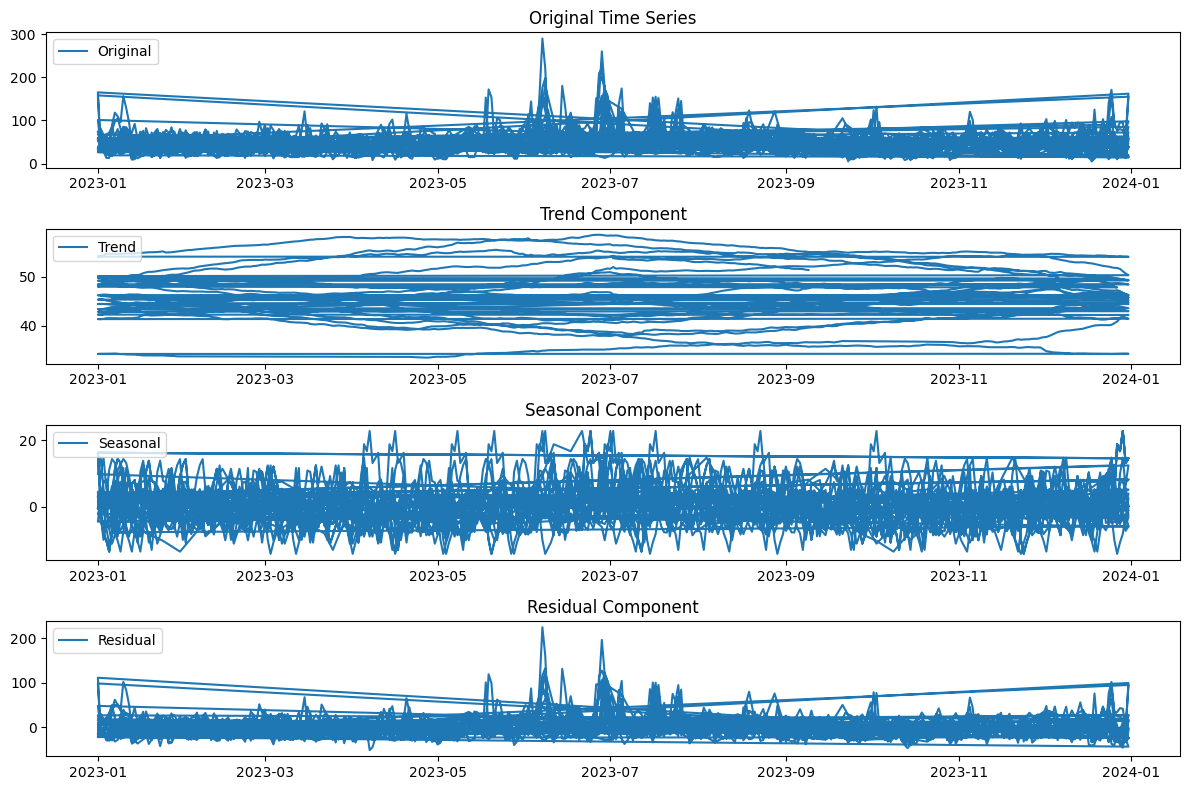

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from statsmodels.tsa.seasonal import seasonal_decompose

# Step 1: Load the dataset
df = pd.read_csv('aqidataset.csv')  # Adjust the file path as necessary

# Step 2: Data preprocessing
df.dropna(inplace=True)  # Remove rows with missing values

# Step 3: Exploratory Data Analysis (EDA)
# Visualize temporal trends
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Overall AQI Value'], marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Overall AQI Value')
plt.title('Temporal Trends in Overall AQI Value')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Correlation between air quality parameters
# Replace non-numeric values with NaN
df[['Ozone', 'PM25', 'CO', 'PM10', 'NO2']] = df[['Ozone', 'PM25', 'CO', 'PM10', 'NO2']].replace('.', np.nan)
df[['Ozone', 'PM25', 'CO', 'PM10', 'NO2']] = df[['Ozone', 'PM25', 'CO', 'PM10', 'NO2']].astype(float)

corr_matrix = df[['Ozone', 'PM25', 'CO', 'PM10', 'NO2']].corr()
plt.figure(figsize=(8, 6))
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.title('Correlation Matrix of Air Quality Parameters')
plt.xticks(range(len(corr_matrix)), corr_matrix.columns, rotation=45)
plt.yticks(range(len(corr_matrix)), corr_matrix.columns)
plt.tight_layout()
plt.show()

# Step 4: Statistical Analysis
# Summary statistics for air quality parameters
summary_stats = df[['Ozone', 'PM25', 'CO', 'PM10', 'NO2']].describe()
print(summary_stats)

# Hypothesis testing (e.g., comparing PM2.5 levels between two cities)
city1_pm25 = df[df['city'] == 'City1']['PM25']
city2_pm25 = df[df['city'] == 'City2']['PM25']

t_stat, p_value = ttest_ind(city1_pm25, city2_pm25)
print(f"T-statistic: {t_stat}, p-value: {p_value}")

# Step 6: Trend Detection and Forecasting
# Decompose time series data for PM2.5
df['Date'] = pd.to_datetime(df['Date'])

# Handling missing values
df.dropna(inplace=True)  # Drop rows with missing values again after converting 'Date' column

decomposition = seasonal_decompose(df.set_index('Date')['PM25'], model='additive', period=365)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot decomposition components
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(df['Date'], df['PM25'], label='Original')
plt.legend(loc='upper left')
plt.title('Original Time Series')
plt.subplot(412)
plt.plot(df['Date'], trend, label='Trend')
plt.legend(loc='upper left')
plt.title('Trend Component')
plt.subplot(413)
plt.plot(df['Date'], seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.title('Seasonal Component')
plt.subplot(414)
plt.plot(df['Date'], residual, label='Residual')
plt.legend(loc='upper left')
plt.title('Residual Component')
plt.tight_layout()
plt.show()

# Step 7: Impact Assessment
# Example: Calculate correlation between PM2.5 and respiratory disease incidence

# Step 8: Documentation and Reporting
# Summarize findings and create visualizations to communicate key insights
# Generate a report or presentation summarizing the analysis and its implications

